<a href="https://colab.research.google.com/github/arunpalanoor/CAMS_DS_Assignments/blob/main/Arun_Palanoor_MNIST_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

# Demonstration 3.1.2 Defining layers in TensorFlow

The MNIST data set, provided by the United States Modified National Institute of Standards and Technology (MNIST), includes 70,000 images of handwritten digits from 0 to 9, each in greyscale format with a resolution of 28x28 pixels. The pixel values range between 0 and 255, showing the grayscale's intensity.

Follow the demonstration to see the application of TensorFlow layers based on the MNIST data set. In this demonstration, you’ll explore layers and the model pipeline to give you an overview of what we’ll explore this week.

## a. Neural network with dense layers

In [ ]:
# Import necessary libraries.
import numpy as np

# Load the MNIST data set.
from keras.datasets import mnist

In [ ]:
# Split the data into train and test sets.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# View the X_train data set.
print(X_train.shape)

(60000, 28, 28)


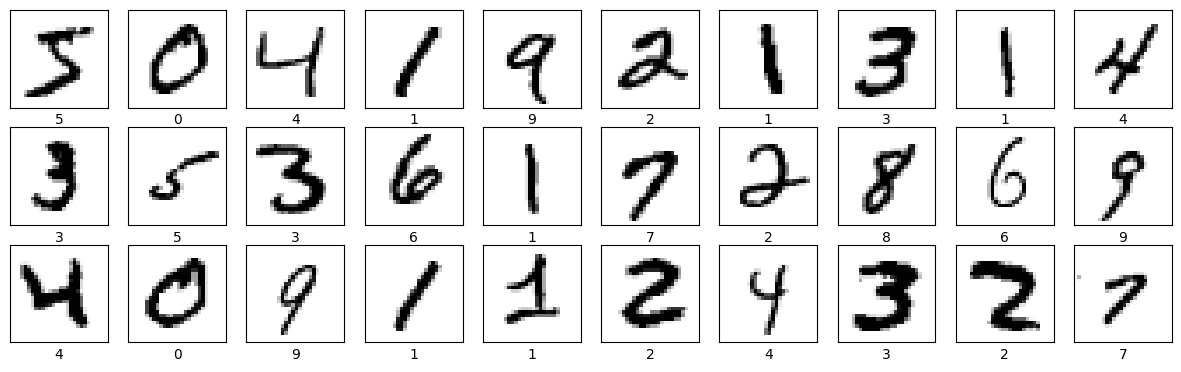

In [ ]:
# Import Matplotlib.
import matplotlib.pyplot as plt

# Plot the first few images.
plt.figure(figsize=(15, 15))
for i in range(30):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
# Flatten and normalise the training and testing data sets.
X_train = X_train.reshape((X_train.shape[0], -1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.0

# View the output.
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# Import to_categorical function.
from keras.utils import to_categorical

# One-hot encode training labels.
y_train_cat = to_categorical(y_train)
# One-hot encode testing labels.
y_test_cat = to_categorical(y_test)

# View the output.
y_test_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#shape of y_test_cat
y_test_cat.shape

(10000, 10)

In [ ]:
# Import necessary functions.
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model.
model = Sequential()

# Add dense layers to the model.
# First hidden layer with 64 units and ReLU activation.
model.add(Dense(units=64,
                activation='relu',
                input_shape=(784, )))
# Second hidden layer with 32 units and ReLU activation.
model.add(Dense(units=32,
                activation='relu'))
# Output hidden layer with 10 units (classes) and softmax activation.
model.add(Dense(units=10,
                activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model.
model.fit(X_train, y_train_cat,
          epochs=10, batch_size=128,
          validation_split=0.2)

# Evaluate the model.
loss, accuracy = model.evaluate(X_test, y_test_cat)

# View the output.
print("\nShape of training data (y_train): ", y_train_cat.shape)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7467 - loss: 0.8604 - val_accuracy: 0.9339 - val_loss: 0.2284
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9377 - loss: 0.2150 - val_accuracy: 0.9533 - val_loss: 0.1618
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9562 - loss: 0.1462 - val_accuracy: 0.9567 - val_loss: 0.1472
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9668 - loss: 0.1153 - val_accuracy: 0.9627 - val_loss: 0.1276
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9712 - loss: 0.0996 - val_accuracy: 0.9634 - val_loss: 0.1217
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9764 - loss: 0.0801 - val_accuracy: 0.9676 - val_loss: 0.1111
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9800 - loss: 0.0701 - val_accuracy: 0.9619 - val_loss: 0.1263
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9819 - loss: 0.0616 - val_accuracy: 0.

## b. Neural network with a flatten layer

In [ ]:
# Preprocess the data using flatten layer.
# Load the MNIST data set.
from keras.datasets import mnist

(X_train_2, y_train), (X_test_2, y_test) = mnist.load_data()

# Normalise training and testing data.
X_train_2 = X_train_2 / 255.0
X_test_2 = X_test_2 / 255.0

# One-hot encode training and testing labels.
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# View the output.
print(y_test.shape)
print(y_test_cat.shape)
print(X_test_2.shape)

(10000,)
(10000, 10)
(10000, 28, 28)


In [ ]:
# Import necessary library.
from keras.layers import Flatten

model_2 = Sequential()
# Add flatten layer to the model.
model_2.add(Flatten(input_shape=(28, 28)))
# First hidden layer with 64 units and ReLU activation.
model_2.add(Dense(units=64, activation='sigmoid'))
# Second hidden layer with 32 units and ReLU activation.
model_2.add(Dense(units=32, activation='relu'))
# Output hidden layer with 10 units (classes) and softmax activation.
model_2.add(Dense(units=10, activation='softmax'))

model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model.
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Train the model.
model_2.fit(X_train_2, y_train_cat,
            epochs=10, batch_size=128,
            validation_split=0.2)

# Evaluate the model.
loss_2, accuracy_2 = model_2.evaluate(X_test_2, y_test_cat)

# View the output.
print("\nShape of training data (y_train): ", y_train_cat.shape)
print(f'Test Loss: {loss_2}, Test Accuracy: {accuracy_2}')

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6836 - loss: 1.2687 - val_accuracy: 0.9168 - val_loss: 0.3085
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9172 - loss: 0.2966 - val_accuracy: 0.9361 - val_loss: 0.2306
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9356 - loss: 0.2224 - val_accuracy: 0.9449 - val_loss: 0.1979
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9458 - loss: 0.1905 - val_accuracy: 0.9503 - val_loss: 0.1758
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9533 - loss: 0.1600 - val_accuracy: 0.9549 - val_loss: 0.1604
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9600 - loss: 0.1414 - val_accuracy: 0.9557 - val_loss: 0.1519
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9638 - loss: 0.1238 - val_accuracy: 0.9607 - val_loss: 0.1393
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9683 - loss: 0.1086 - val_accuracy: 0.

# Key information
This demonstration illustrated the application of TensorFlow layers and the model pipeline.

## Reflect
What are the practical applications of this technique?

> Select the pen from the toolbar to add your entry.